In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
df = pd.read_csv('foodhub_order.csv')

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

###  How many rows and columns are present in the data?

In [5]:
df.shape

(1898, 9)

#### Observations:

* The DataFrame has 1898 rows and 9 columns.

###  What are the datatypes of the different columns in the dataset?


In [6]:
# print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are a total of 1898 non-null observations in each of the columns.

* The dataset contains 9 columns: 4 are of integer type ('order_id', 'customer_id', 'food_preparation_time', 'delivery_time'), 1 is of floating point type ('cost_of_the_order') and 4 are of the general object type ('restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating').

* Total memory usage is approximately 133.6 KB.



### Are there any missing values in the data?

In [7]:
# Checking for missing values
df.isna().any()

,0
order_id,False
customer_id,False
restaurant_name,False
cuisine_type,False
cost_of_the_order,False
day_of_the_week,False
rating,False
food_preparation_time,False
delivery_time,False


#### Observations:

* There are no missing values in the data.


### Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [8]:
# get the summary statistics of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:

* Order ID and Customer ID are just identifiers for each order.

* The cost of an order ranges from 4.47 to 35.41 dollars, with an average order costing around 16 dollars and a standard deviation of 7.5 dollars. The cost of 75% of the orders are below 23 dollars. This indicates that most of the customers prefer low-cost food compared to the expensive ones.

* Food preparation time ranges from 20 to 35 minutes, with an average of around 27 minutes and a standard deviation of 4.6 minutes. The spread is not very high for the food preparation time.

* Delivery time ranges from 15 to 33 minutes, with an average of around 24 minutes and a standard deviation of 5 minutes. The spread is not too high for delivery time either.


### How many orders are not rated?

In [9]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:

* There are 736 orders that are not rated.

### **Exploratory Data Analysis (EDA)**

### Univariate Analysis

### Exploring all the variables with observations on their distributions

#### Order ID

In [10]:
# check unique order ID
df['order_id'].nunique()

1898

#### Observations:

* There are 1898 unique orders. As mentioned earlier, 'order_id' is just an identifier for the orders.

#### Customer ID

In [11]:
# check unique customer ID
df['customer_id'].nunique()

1200

#### Observations:

* There are 1200 unique customers. As 'customer_id' is a variable to identify customers, and the number of unique customer IDs is less than the number of unique order IDs, we can see that there are some customers who have placed more than one order.


#### Restaurant name

In [12]:
# check unique restaurant name
df['restaurant_name'].nunique()

178

#### Observations:

* There are 178 unique restaurants in the dataset.

* Let's check the number of orders that get served by the restaurants.

In [13]:
df['restaurant_name'].value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Sushi Choshi,1
Dos Caminos Soho,1
La Follia,1


#### Observations:

* The restaurant that has received maximum number of orders is Shake Shack

#### Cuisine type

In [14]:
# check unique cuisine type
df['cuisine_type'].nunique()

14

In [15]:
# count of each cuisine type
df['cuisine_type'].value_counts()

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


<ipython-input-16-c31006a1ffda>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cuisine_type', palette='Paired')


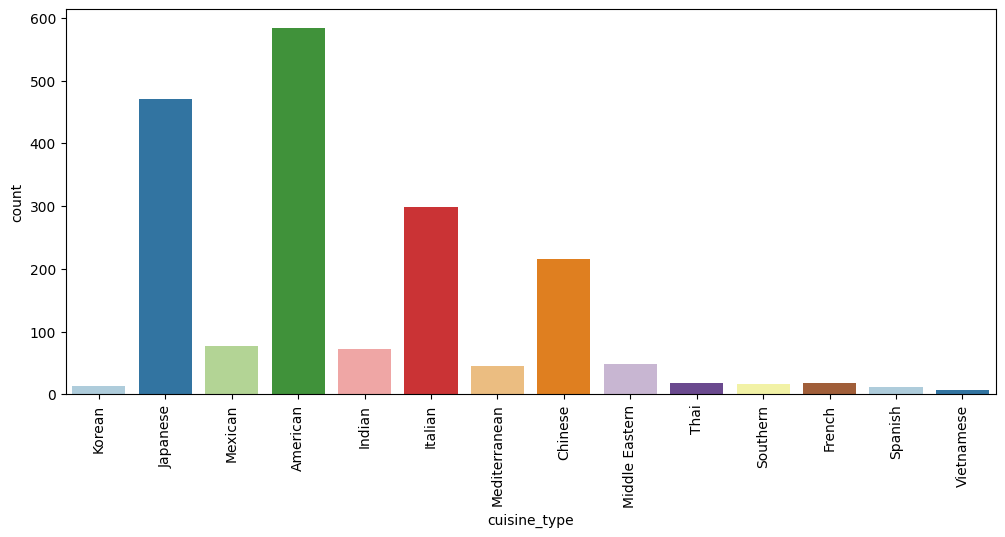

In [16]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='cuisine_type', palette='Paired')
plt.xticks(rotation=90)
plt.show()


#### Observations:

* There are 14 unique cuisines in the dataset.

* The distribution of cuisine types show that cuisine types are not equally distributed.

* The most frequent cuisine type is American followed by Japanese and Italian.

* Vietnamese appears to be the least popular of all the cuisines.

#### Cost of the order

In [17]:
sns.set_theme(palette='pastel')

In [18]:
# mean of each cuisine type
df.groupby('cuisine_type')['cost_of_the_order'].mean()

,cost_of_the_order
cuisine_type,
American,16.319829
Chinese,16.305209
French,19.793889
Indian,16.919726
Italian,16.418691
Japanese,16.304532
Korean,14.001538
Mediterranean,15.474783
Mexican,16.933117


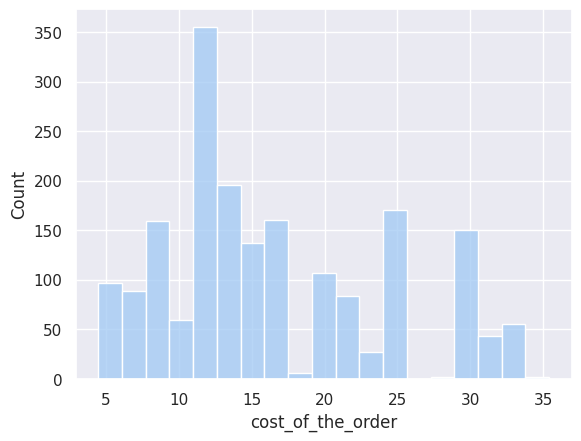

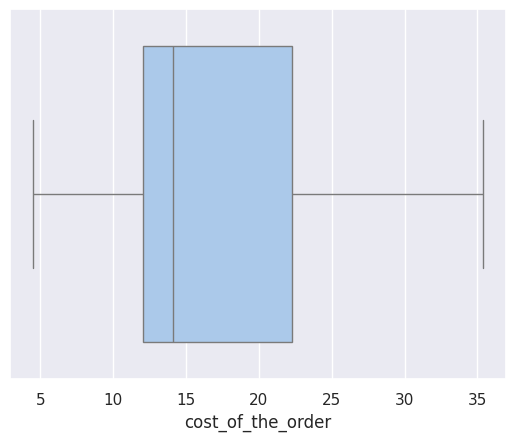

In [19]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

#### Observations:

* The average cost of the order is greater than the median cost indicating that the distribution for the cost of the order is right-skewed.

* The mode of the distribution indicates that a large chunk of people prefer to order food that costs around 10-12 dollars.

* There are few orders that cost greater than 30 dollars. These orders might be for some expensive meals.

#### Day of the week

In [20]:
# check the unique values
df['day_of_the_week'].value_counts()

,count
day_of_the_week,
Weekend,1351
Weekday,547


<Axes: xlabel='day_of_the_week', ylabel='count'>

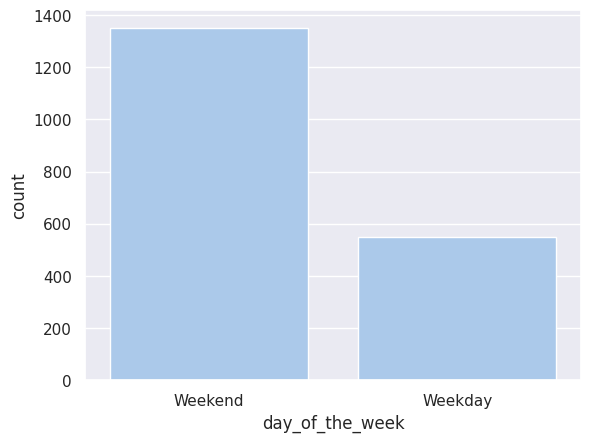

In [21]:
sns.countplot(data = df, x = 'day_of_the_week')

#### Observations:

* The 'day_of_the_week' columns consists of 2 unique values - Weekday and Weekend
* The distribution shows that number of order placed on weekends is approximately double the number of orders placed on weekdays.

#### Rating

In [22]:
# check the unique values
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


<Axes: xlabel='rating', ylabel='count'>

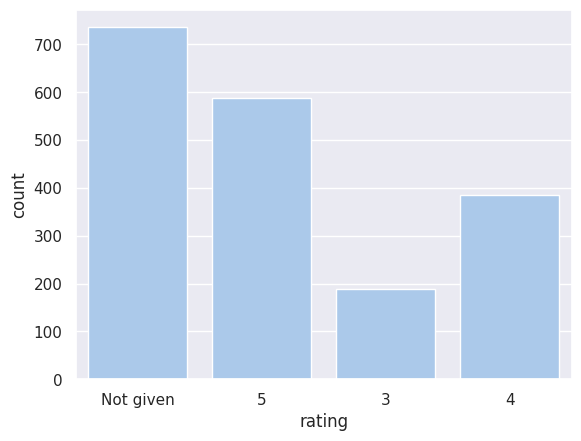

In [23]:
sns.countplot(data = df, x = 'rating')

#### Observations:

* The distribution of 'rating' shows that the most frequent rating category is 'not given', followed by a rating of 5.

* Only around 200 orders have been rated 3.

#### Food Preparation time

In [24]:
# summary stats of just the food prep column
df.describe()['food_preparation_time']

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


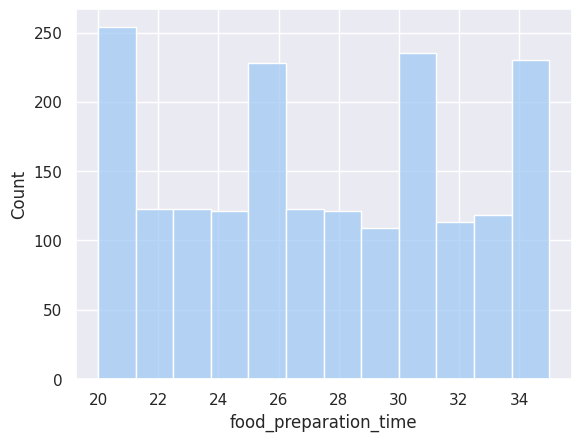

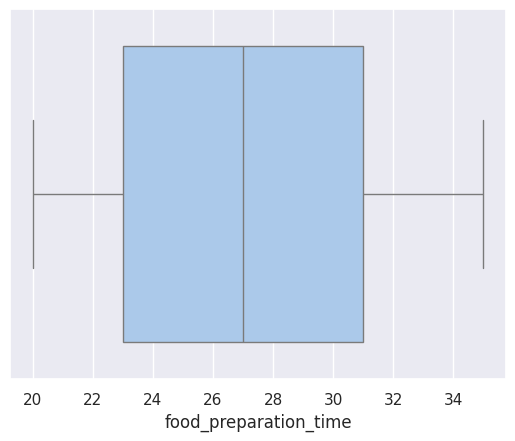

In [25]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Observations:

* The average food preparation time is almost equal to the median food preparation time indicating that the distribution is nearly symmetrical.

* The food preparation time is pretty evenly distributed between 20 and 35 minutes.

* There are no outliers in this column.

#### Delivery time

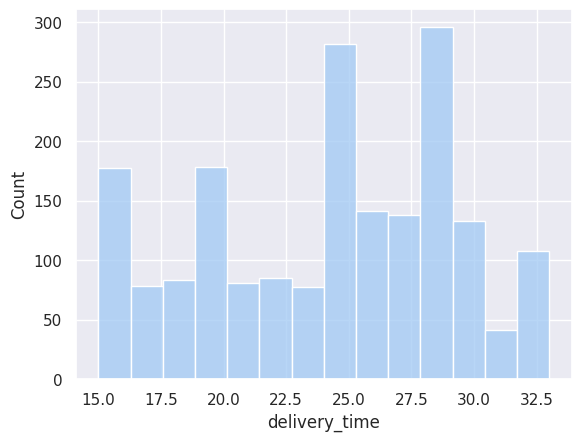

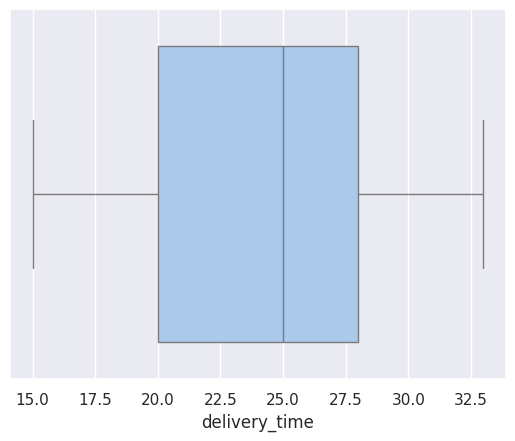

In [26]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

#### Observations:

* The average delivery time is a bit smaller than the median delivery time indicating that the distribution is a bit left-skewed.

* Comparatively more number of orders have delivery time between 24 and 30 minutes.

* There are no outliers in this column.

### Which are the top 5 restaurants in terms of the number of orders received?

In [27]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts()[:5]

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

* Top 5 popular restaurants that have received the highest number of orders **'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken' and 'Parm'**.

* Almost 33% of the orders in the dataset are from these restaurants.


### Which is the most popular cuisine on weekends?

In [28]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


#### Observations:

* The most popular cuisine type on weekends is American.


### What percentage of the orders cost more than 20 dollars?

In [29]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]

# Calculate the number of total orders where the cost is above 20 dollars

print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:

* There are a total of 555 orders that cost above 20 dollars.

* The percentage of such orders in the dataset is around 29.24%.


### What is the mean order delivery time?

In [30]:
# get the mean delivery time
print('The mean delivery time for this dataset is', round(df['delivery_time'].mean(), 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:

* The mean delivery time is around 24.16 minutes.


### The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [31]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


#### Observations:
- Customer with ID 52832 has ordered 13 times.


### Multivariate Analysis

### Multivariate analysis to explore relationships between the important variables in the dataset.

#### Cuisine vs Cost of the order

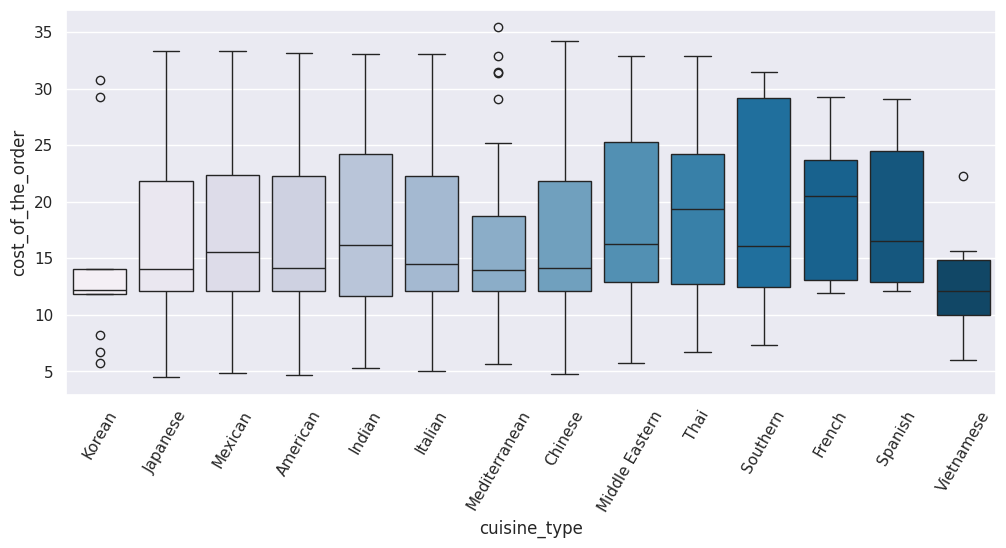

In [32]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(12,5))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, hue="cuisine_type", palette = 'PuBu', legend=False)
plt.xticks(rotation = 60)
plt.show()

#### Observations:

* Vietnamese and Korean cuisines cost less compared to other cuisines.
* The boxplots for Italian, American, Chinese, Japanese cuisines are quite similar. This indicates that the quartile costs for these cuisines are quite similar.
* Outliers are present for the cost of Korean, Mediterranean and Vietnamese cuisines.
* French and Spanish cuisines are costlier compared to other cuisines.

#### Cuisine vs Food Preparation time

<ipython-input-33-0044edfb343c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')


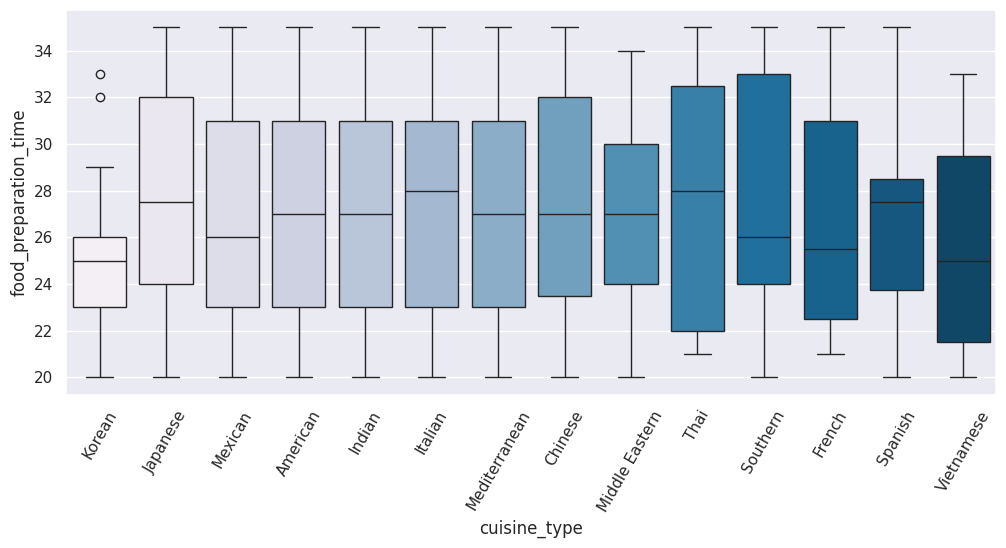

In [33]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(12,5))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:

* Food preparation time is very consistent for most of the cuisines.
* The median food preparation time lies between 24 and 30 minutes for all the cuisines.
* Outliers are present for the food preparation time of Korean cuisine.
* Korean cuisine takes less time compared to the other cuisines.


#### Day of the Week vs Delivery time

<ipython-input-34-f29d1cf559a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')


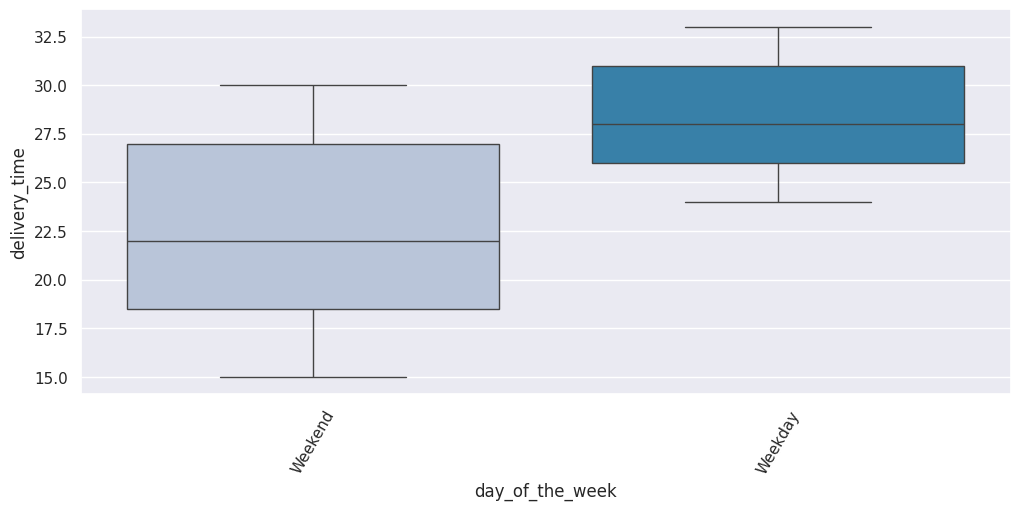

In [34]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(12,5))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:

* The delivery time for all the orders over the weekends is less compared to weekdays. This could be due to the dip in traffic over the weekends.


#### Revenue generated by the restaurants

In [35]:
plt.figure(figsize = (15, 7))
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


<Figure size 1500x700 with 0 Axes>

#### Observations:

* The above 14 restaurants are generating more than 500 dollars revenue.


#### Rating vs Delivery time

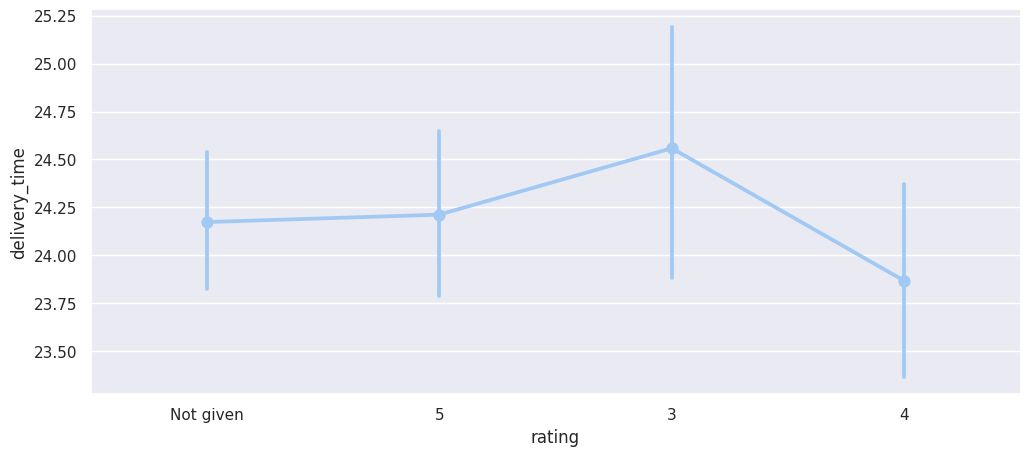

In [36]:
# Relationship between rating and delivery time
plt.figure(figsize=(12, 5))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observations:

* It is possible that delivery time plays a role in the low-rating of the orders.


#### Rating vs Food preparation time

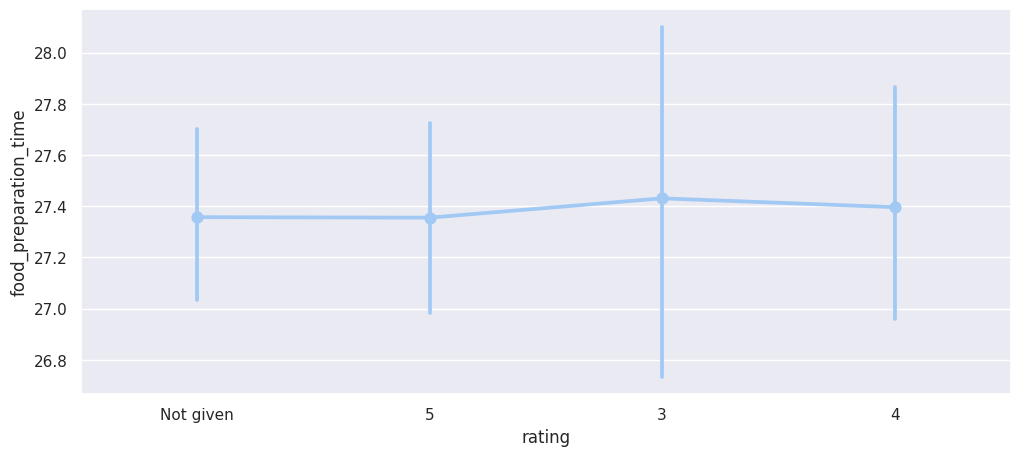

In [37]:
# Relationship between rating and food preparation time
plt.figure(figsize=(12, 5))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

#### Observations:

* It seems that food preparation time does not play a role in the low-rating of the orders.


#### Rating vs Cost of the order

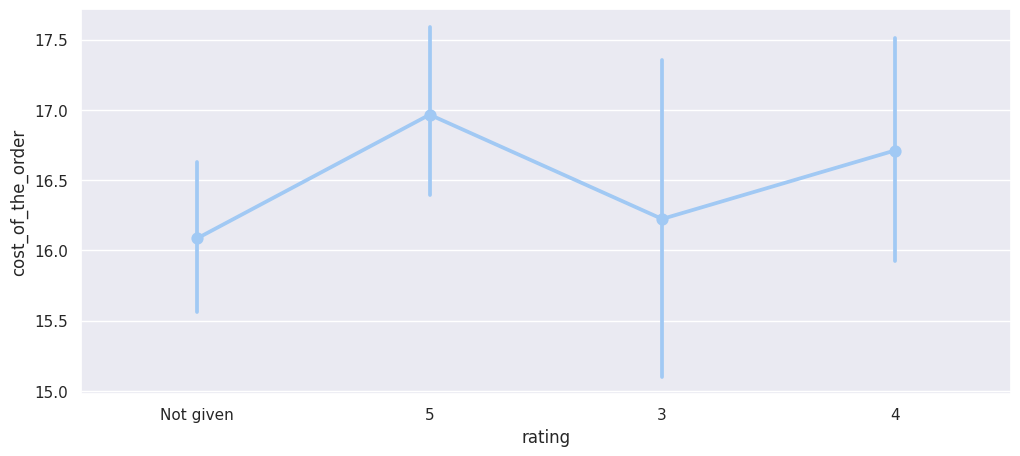

In [38]:
# Relationship between rating and cost of the order
plt.figure(figsize=(12, 5))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

#### Observations

* It seems that high-cost orders have been rated well and low-cost orders have not been rated.

#### Correlation among variables

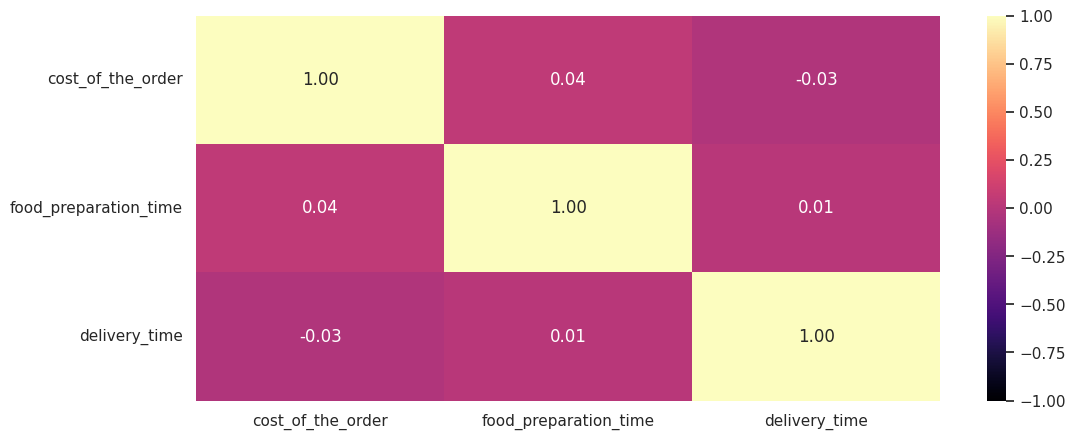

In [39]:

# plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(12, 5))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="magma")
plt.show()



#### Observations:

* There is no correlation between cost of the order, delivery time and food preparation time.


### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [40]:
# filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
# convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')
# create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [41]:
# get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
# filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
# find the mean rating of the restaurants
df_mean_4.groupby(df_mean_4['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

* The restaurants fulfilling the criteria to get the promotional offer are: 'The Meatball Shop', 'Blue Ribbon Fried Chicken',  'Shake Shack' and 'Blue Ribbon Sushi'.


### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [42]:
#function to determine the net revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [43]:
# get the total revenue
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:

* The net revenue generated on all the orders given in the dataset is around 6166.3 dollars.


### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.

In [44]:
# add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# find the percentage of orders that have more than 60 minutes of total delivery time
print ('The percentage of orders that have more than 60 minutes of total delivery time is',
       round(df[df['total_time'] > 60].shape[0] / df.shape[0] * 100, 2),'%')

The percentage of orders that have more than 60 minutes of total delivery time is 10.54 %


#### Observations:

* Approximately 10.54 % of the total orders have more than 60 minutes of total delivery time.


### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [45]:
# mean delivery time on weekdays
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# mean delivery time on weekends
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:

* The mean delivery time on weekdays is around 28 minutes whereas the mean delivery time on weekends is around 22 minutes.

* This could be due to the dip of traffic volume in the weekends.

### Conclusions:  
- About 80% of orders are for American, Japanese, Italian, and Chinese cuisines, showing these are the favorites among FoodHub customers.  
- Shake Shack stands out as the most popular restaurant with the highest number of orders.  
- People tend to order more on weekends compared to weekdays.  
- Delivery times are faster on weekends, possibly because there’s less traffic.  
- Nearly 39% of orders don’t have a customer rating.  


### Business Recommendations:  
- FoodHub should partner more with restaurants serving American, Japanese, Italian, and Chinese cuisines since they’re the most popular choices.  
- Offer promotions to top-rated and popular restaurants like Shake Shack to keep them thriving.  
- Since weekends are busier, hire extra delivery drivers to handle the higher order volumes. Weekend deals could also attract even more customers.  
- Ratings are key to understanding customer satisfaction. FoodHub should figure out why many orders aren’t rated and make the rating process easier and more engaging to encourage customers to leave feedback.  
- About 11% of orders take over 60 minutes to deliver, which can annoy customers. To fix this, FoodHub could reward delivery drivers who consistently deliver on time.